**Problem 1:**

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
# Pandas and Numpy libraries
# Pandas - For data manululation
# Numpy -  for numeric calculation
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
# For plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
# For scaling the data
from scipy.stats import zscore
# For visualization
from sci_analysis import analyze
# For filtering warning messages
import warnings 
# For Modeling 
from sklearn.linear_model import LogisticRegression

#For Model Performance and Tuning
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")

# For Modeling 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Model Evaluation
from sklearn import metrics,model_selection

# Scaling the dataset
from sklearn.preprocessing import scale

# For Modeling 
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings( "ignore")

**Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


In [2]:
#To import the file
df=pd.read_excel(r'C:\Users\dell\Downloads\Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.shape

(1525, 10)

In [6]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0'],inplace=True, axis=1)

In [8]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
df.shape

(1525, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [11]:
df.duplicated().sum()

8

In [12]:
np.where(df.duplicated())

(array([  67,  626,  870,  983, 1154, 1236, 1244, 1438], dtype=int64),)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [15]:
df.describe(exclude='int64').T

,count,unique,top,freq
vote,1517,2,Labour,1057
gender,1517,2,female,808


In [16]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [17]:
df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [18]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [19]:
#Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables with values as “?”.
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


**EDA**

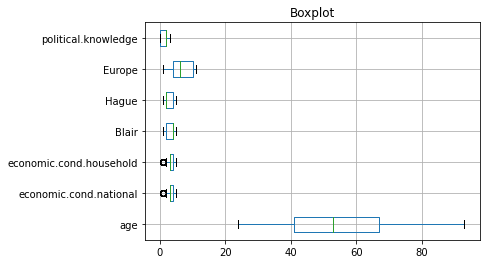

In [20]:
plt.title('Boxplot')
df.boxplot(figsize=(30,30),vert=0)
plt.show()

Distribution of age


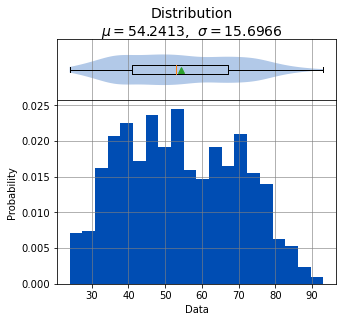



Statistics
----------

n         =  1517
Mean      =  54.2413
Std Dev   =  15.6966
Std Error =  0.4030
Skewness  =  0.1397
Kurtosis  = -0.9446
Maximum   =  93.0000
75%       =  67.0000
50%       =  53.0000
25%       =  41.0000
Minimum   =  24.0000
IQR       =  26.0000
Range     =  69.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9761
p value =  0.0000

HA: Data is not normally distributed

---x-------x-------x-----


Distribution of economic.cond.national


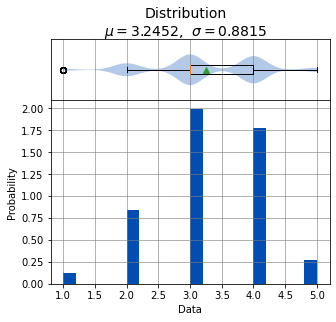



Statistics
----------

n         =  1517
Mean      =  3.2452
Std Dev   =  0.8815
Std Error =  0.0226
Skewness  = -0.2382
Kurtosis  = -0.2597
Maximum   =  5.0000
75%       =  4.0000
50%       =  3.0000
25%       =  3.0000
Minimum   =  1.0000
IQR       =  1.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8854
p value =  0.0000

HA: Data is not normally distributed

---x-------x-------x-----


Distribution of economic.cond.household


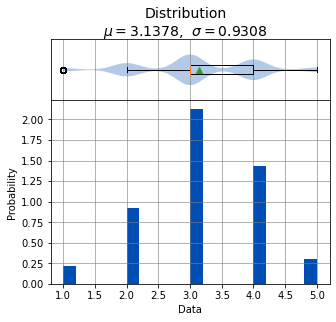



Statistics
----------

n         =  1517
Mean      =  3.1378
Std Dev   =  0.9308
Std Error =  0.0239
Skewness  = -0.1440
Kurtosis  = -0.2123
Maximum   =  5.0000
75%       =  4.0000
50%       =  3.0000
25%       =  3.0000
Minimum   =  1.0000
IQR       =  1.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8986
p value =  0.0000

HA: Data is not normally distributed

---x-------x-------x-----


Distribution of Blair


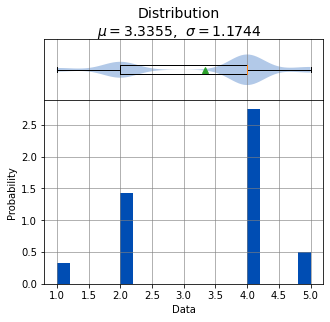



Statistics
----------

n         =  1517
Mean      =  3.3355
Std Dev   =  1.1744
Std Error =  0.0302
Skewness  = -0.5390
Kurtosis  = -1.0607
Maximum   =  5.0000
75%       =  4.0000
50%       =  4.0000
25%       =  2.0000
Minimum   =  1.0000
IQR       =  2.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7872
p value =  0.0000

HA: Data is not normally distributed

---x-------x-------x-----


Distribution of Hague


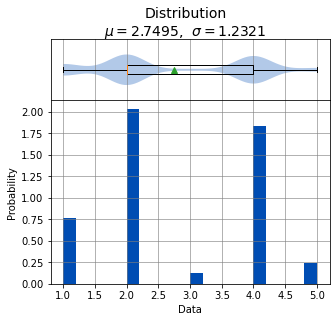



Statistics
----------

n         =  1517
Mean      =  2.7495
Std Dev   =  1.2321
Std Error =  0.0316
Skewness  =  0.1460
Kurtosis  = -1.3945
Maximum   =  5.0000
75%       =  4.0000
50%       =  2.0000
25%       =  2.0000
Minimum   =  1.0000
IQR       =  2.0000
Range     =  4.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8280
p value =  0.0000

HA: Data is not normally distributed

---x-------x-------x-----


Distribution of Europe


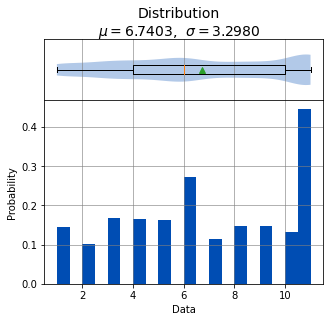



Statistics
----------

n         =  1517
Mean      =  6.7403
Std Dev   =  3.2980
Std Error =  0.0847
Skewness  = -0.1418
Kurtosis  = -1.2367
Maximum   =  11.0000
75%       =  10.0000
50%       =  6.0000
25%       =  4.0000
Minimum   =  1.0000
IQR       =  6.0000
Range     =  10.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9145
p value =  0.0000

HA: Data is not normally distributed

---x-------x-------x-----


Distribution of political.knowledge


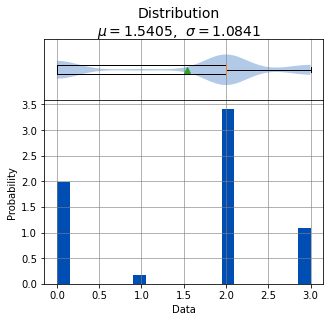



Statistics
----------

n         =  1517
Mean      =  1.5405
Std Dev   =  1.0841
Std Error =  0.0278
Skewness  = -0.4225
Kurtosis  = -1.2222
Maximum   =  3.0000
75%       =  2.0000
50%       =  2.0000
25%       =  0.0000
Minimum   =  0.0000
IQR       =  2.0000
Range     =  3.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7749
p value =  0.0000

HA: Data is not normally distributed

---x-------x-------x-----




In [21]:
## Looping 
for column in df.columns:
    if df[column].dtype != 'object':
        print("Distribution of " + column)
        analyze(df[column]) 
        print('---x-------x-------x-----')
        print('\n')

Distribution of vote


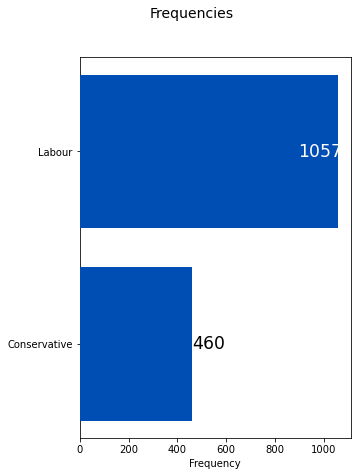



Overall Statistics
------------------

Total            =  1517
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             1057           69.6770      Labour        
2             460            30.3230      Conservative  
---x-------x-------x-----


Distribution of gender


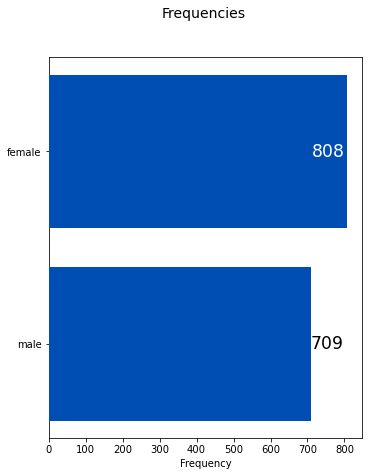



Overall Statistics
------------------

Total            =  1517
Number of Groups =  2


Statistics
----------

Rank          Frequency     Percent       Category      
--------------------------------------------------------
1             808            53.2630      female        
2             709            46.7370      male          
---x-------x-------x-----




In [22]:
for column in df.columns:
    if df[column].dtype == 'object':
        print("Distribution of " + column)
        analyze(df[column]) 
        print('---x-------x-------x-----')
        print('\n')

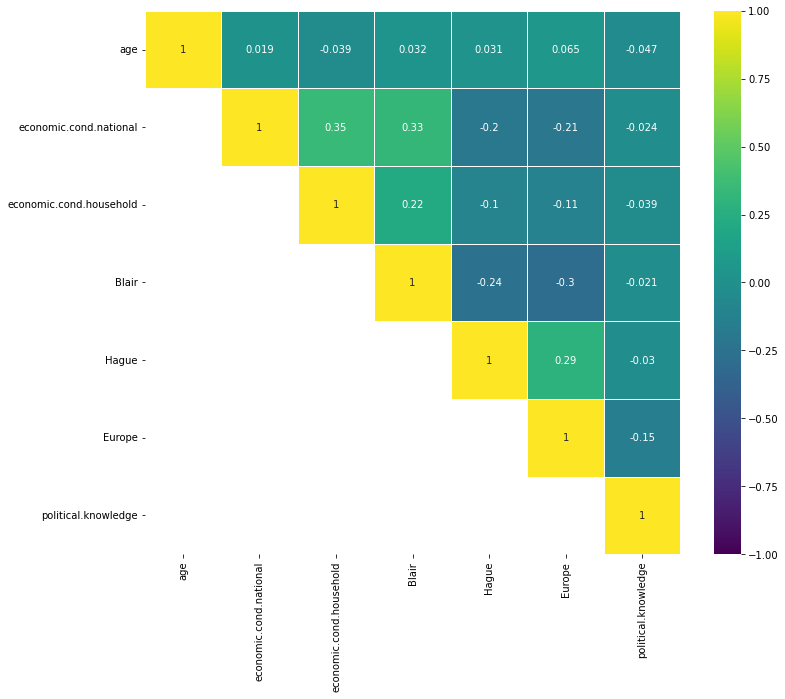

In [23]:
df_Corr = df.corr()
plt.figure(figsize=(12 ,10))
mask = np.array(df_Corr)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =df_Corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='viridis',linewidths=0.9);

<Figure size 576x360 with 0 Axes>

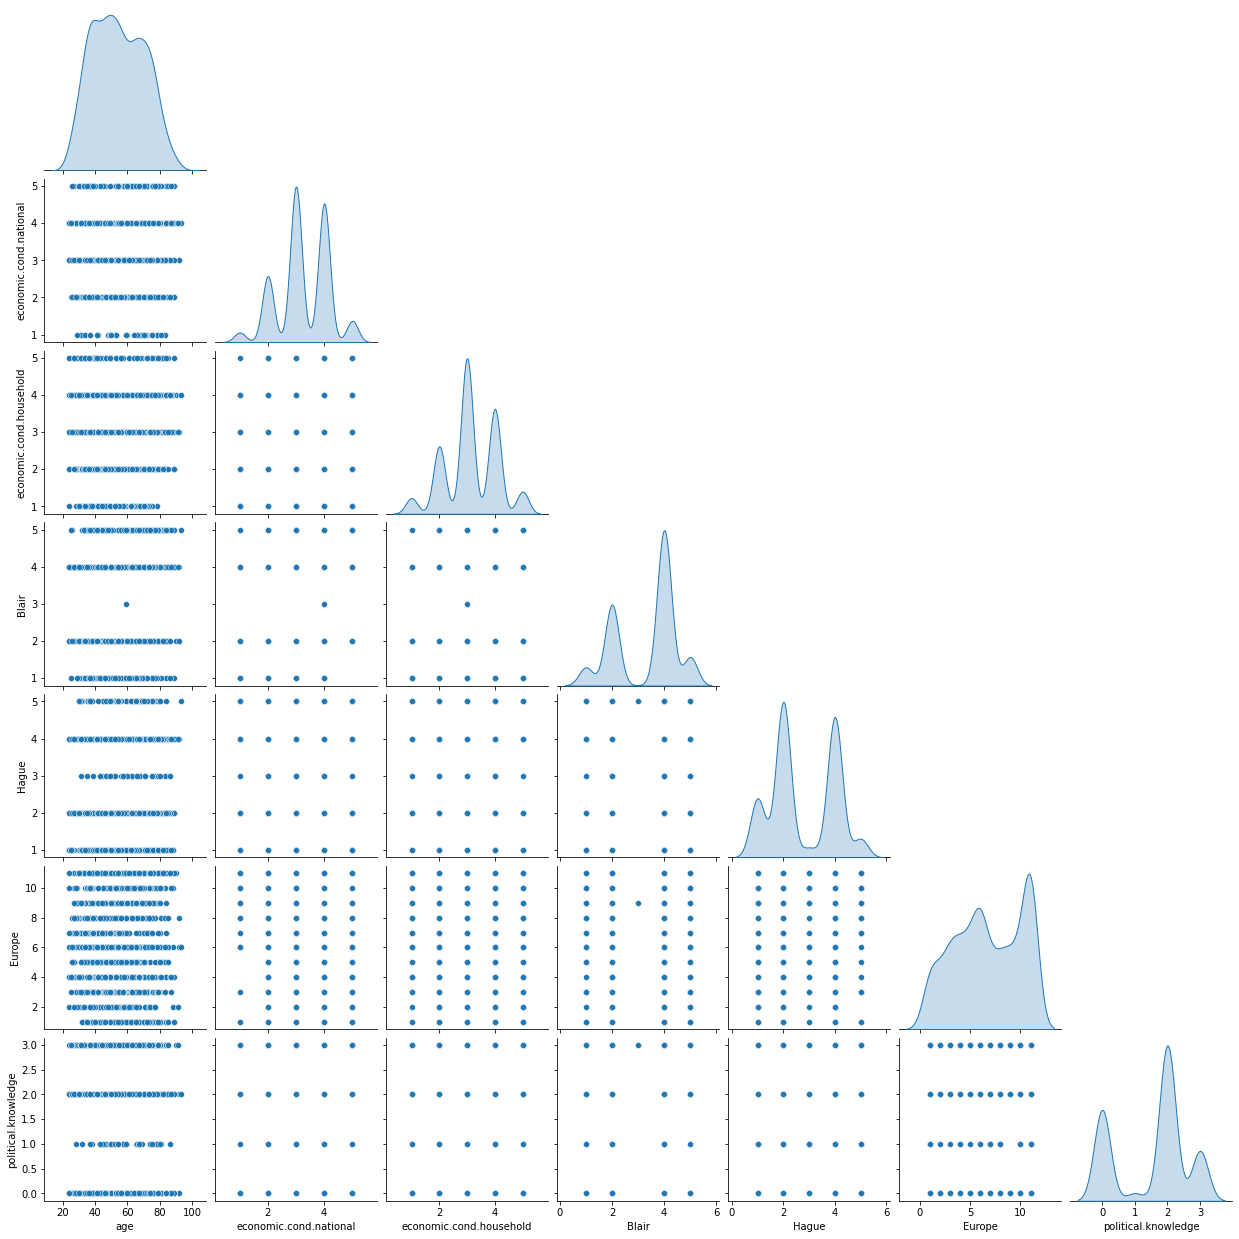

In [24]:
plt.figure(figsize=(8,5));
sns.pairplot(df,diag_kind='kde', corner=True);

In [25]:
from matplotlib import style
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [26]:
plt.style.use('_mpl-gallery-nogrid')

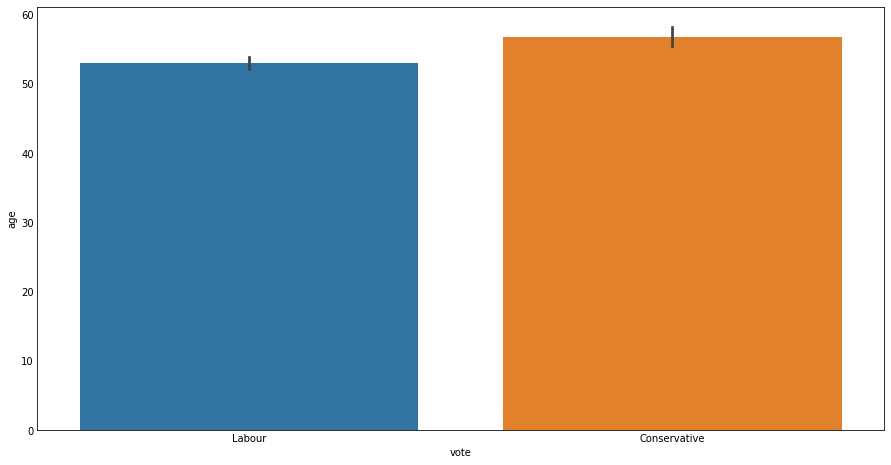

In [27]:
plt.figure(figsize=(12 ,6))
sns.barplot(data=df, x='vote', y='age');

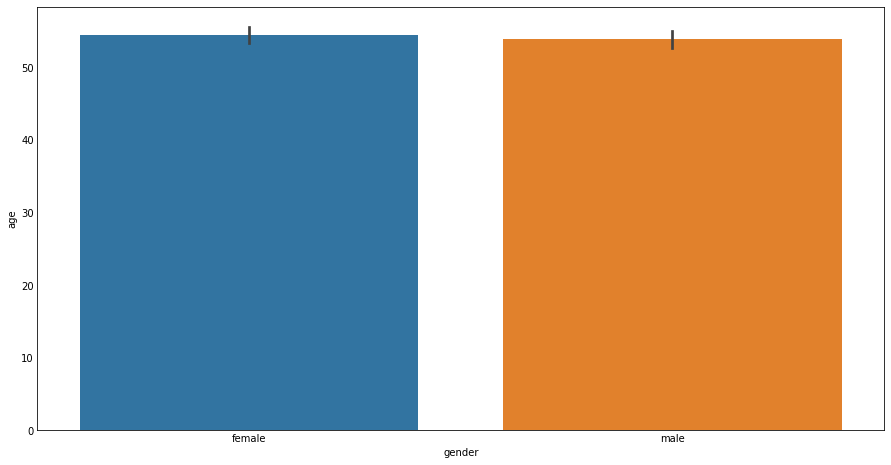

In [28]:
plt.figure(figsize=(12 ,6))
sns.barplot(data=df, x='gender', y='age');

<AxesSubplot:xlabel='vote'>

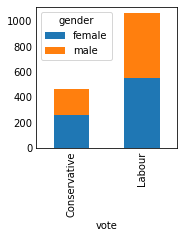

In [29]:
pd.crosstab(df['vote'],df['gender']).plot(kind="bar",stacked=True)

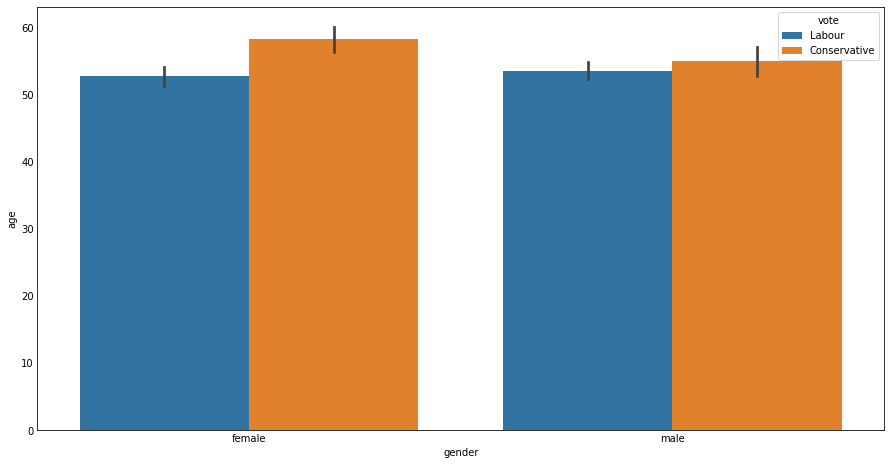

In [30]:
plt.figure(figsize=(12 ,6))
sns.barplot(data=df, x='gender', y='age',hue='vote');

In [31]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

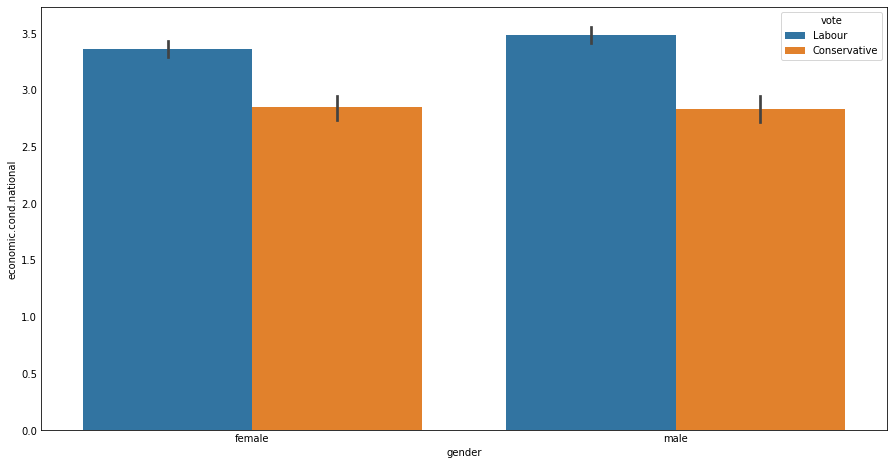

In [32]:
plt.figure(figsize=(12 ,6))
sns.barplot(data=df, x='gender', y='economic.cond.national',hue='vote');

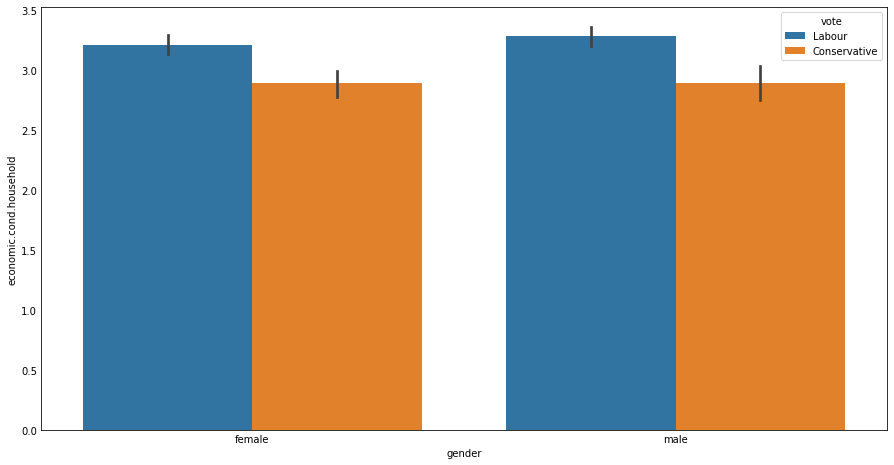

In [33]:
plt.figure(figsize=(12 ,6))
sns.barplot(data=df, x='gender', y='economic.cond.household',hue='vote');

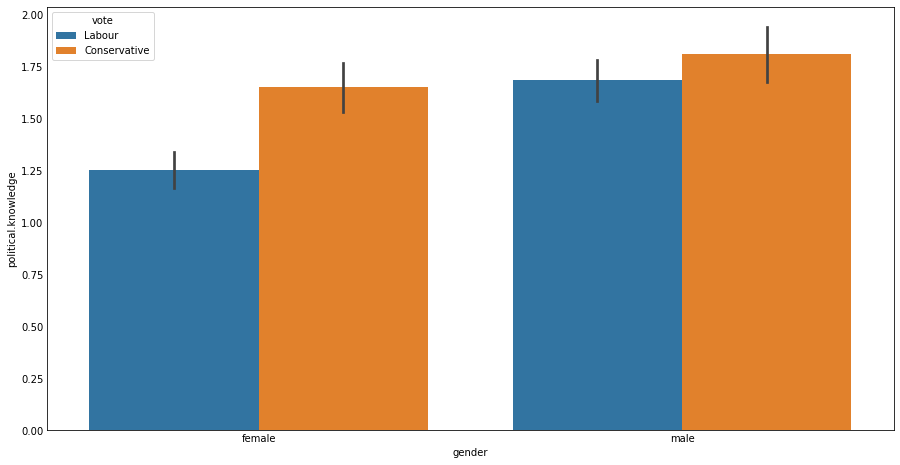

In [34]:
plt.figure(figsize=(12 ,6))
sns.barplot(data=df, x='gender', y='political.knowledge',hue='vote');

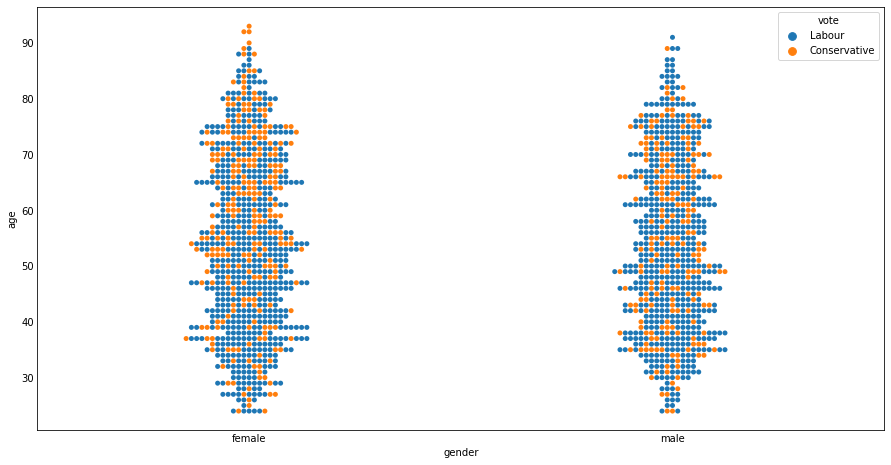

In [35]:
plt.figure(figsize=(12 ,6))
sns.swarmplot(data=df, x='gender', y='age',hue='vote');

In [36]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [37]:
df['vote'] = LE.fit_transform(df['vote'])
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male
3,1,24,4,2,2,1,4,0,female
4,1,41,2,2,1,1,6,2,male


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   int32 
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int32(1), int64(7), object(1)
memory usage: 144.9+ KB


In [39]:
cat

['vote', 'gender']

In [40]:
cat1=['gender']

In [41]:
cat1

['gender']

In [42]:
df =pd.get_dummies(df, columns=cat1,drop_first=True)

In [43]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender_male              1517 non-null   uint8
dtypes: int32(1), int64(7), uint8(1)
memory usage: 134.5 KB


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
df[["age"]] = scaler.fit_transform(df[["age"]])

In [48]:
# Arrange data into independent variables and dependent variables
X = df.drop('vote',axis=1)  ## Features
y = df['vote']  ## Target

In [49]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [50]:
# Checking the raito of dependent variable from train
y_train.value_counts(normalize = True)

1    0.71065
0    0.28935
Name: vote, dtype: float64

In [51]:
X_train.shape

(1061, 8)

In [52]:
X_test.shape

(456, 8)

In [53]:
y_train.shape

(1061,)

In [54]:
y_test.shape

(456,)

**Logistic Regression**

In [55]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.9s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [56]:
# Predicting on Training and Test Dataset
ytrain_predict=model.predict(X_train)
ytest_predict=model.predict(X_test)

In [57]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.424284,0.575716
1,0.148426,0.851574
2,0.007187,0.992813
3,0.836350,0.163650
4,0.068407,0.931593
5,0.057514,0.942486
6,0.372131,0.627869
7,0.221332,0.778668
8,0.042649,0.957351
9,0.140583,0.859417


In [58]:
# Model Evaluation 
model.score(X_train,y_train)

0.8312912346842601

AUC: 0.890


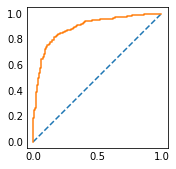

In [59]:
#Predict Probabilites
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [60]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8355263157894737

AUC: 0.890


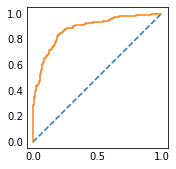

In [61]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

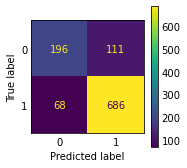

In [62]:
plot_confusion_matrix(model,X_train,y_train);

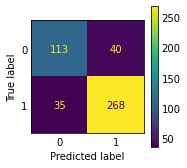

In [63]:
plot_confusion_matrix(model,X_test,y_test);

In [64]:
print("***Train Data Report***")
print(classification_report(y_train, ytrain_predict),"\n\n")
print("***Test Data Report***")
print(classification_report(y_test,ytest_predict))

***Train Data Report***
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 


***Test Data Report***
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



**Applying GridSearchCV for Logistic Regression**

In [65]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [66]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [67]:
model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [68]:
grid_search = GridSearchCV(estimator = model,cv=4, param_grid = grid,n_jobs=-1,scoring='f1')

In [69]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [70]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag')


In [71]:
best_model_log = grid_search.best_estimator_

In [72]:
# Prediction on the training set

ytrain_predict = best_model_log.predict(X_train)
ytest_predict = best_model_log.predict(X_test)

In [73]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model_log.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.415555,0.584445
1,0.153533,0.846467
2,0.006866,0.993134
3,0.835028,0.164972
4,0.073152,0.926848


              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



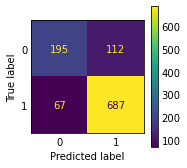

In [74]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model_log,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



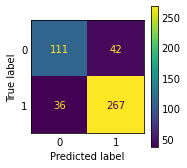

In [75]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_log,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

**LDA**

In [76]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
modellda=clf.fit(X_train,y_train)

In [77]:
#intercept value
clf.intercept_ 

array([2.14672669])

In [78]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-1.38255637,  0.60492045,  0.05006905,  0.74240039, -0.92663438,
        -0.22361192, -0.43033484,  0.14907998]])

In [79]:
## Getting the equation
round(pd.DataFrame(clf.coef_.reshape(1,-1),columns=X_train.columns),2).T

,0
age,-1.38
economic.cond.national,0.60
economic.cond.household,0.05
Blair,0.74
Hague,-0.93
Europe,-0.22
political.knowledge,-0.43
gender_male,0.15


In [80]:
# Writing the equation
for i in range(0,X_train.shape[1]):
    print('{} * {}'.format(np.round(clf.coef_[0][i],2),X_train.columns[i]),end=' (+) ')

-1.38 * age (+) 0.6 * economic.cond.national (+) 0.05 * economic.cond.household (+) 0.74 * Blair (+) -0.93 * Hague (+) -0.22 * Europe (+) -0.43 * political.knowledge (+) 0.15 * gender_male (+) 

In [81]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = modellda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = modellda.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



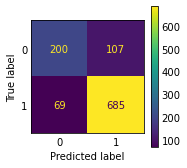

In [82]:
## Confusion matrix on the training data

plot_confusion_matrix(modellda,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



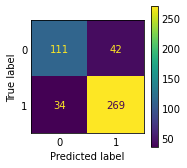

In [83]:
## Confusion matrix on the test data

plot_confusion_matrix(modellda,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.889


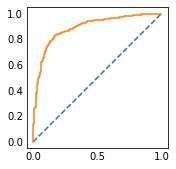

In [84]:
#Predict Probabilites
probs = modellda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.889


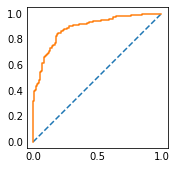

In [85]:
# predict probabilities
probs = modellda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Naive Bayes**

In [86]:
## Importing the Naive Bayes & Metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [87]:
## Gaussian means it follows a distribution
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [88]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)

0.8350612629594723


In [89]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = NB_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = NB_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       307
           1       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



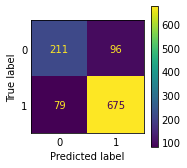

In [90]:
## Confusion matrix on the training data

plot_confusion_matrix(NB_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



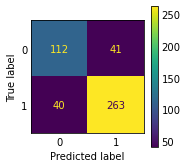

In [91]:
## Confusion matrix on the test data

plot_confusion_matrix(NB_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.888


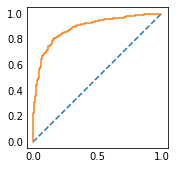

In [92]:
#Predict Probabilites
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.888


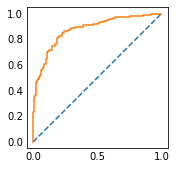

In [93]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**K-Fold Validation**

In [94]:
from sklearn.model_selection import cross_val_score,cross_val_predict
scores = cross_val_score(NB_model,X_train, y_train, cv =10)
print("Cross Validation Score:", scores,scores)
print("Average Score:", np.average(scores))

Cross Validation Score: [0.80373832 0.78301887 0.8490566  0.83962264 0.90566038 0.8490566
 0.78301887 0.83962264 0.81132075 0.82075472] [0.80373832 0.78301887 0.8490566  0.83962264 0.90566038 0.8490566
 0.78301887 0.83962264 0.81132075 0.82075472]
Average Score: 0.8284870393228706


Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

In [95]:
NB_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [96]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=params_NB,
                     verbose=1, 
                     scoring='accuracy')


In [97]:
gs_NB.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [98]:
gs_NB.best_params_

{'var_smoothing': 0.04328761281083057}

0.8341187558906692
[[202 105]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



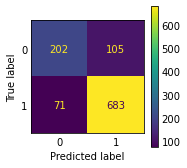

In [99]:
## Performance Matrix on train data set
y_train_predict = gs_NB.predict(X_train)
model_score = gs_NB.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
## Confusion matrix on the training data

plot_confusion_matrix(gs_NB,X_train,y_train)

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



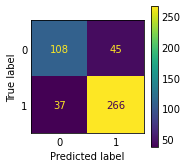

In [100]:
## Performance Matrix on test data set
y_test_predict = gs_NB.predict(X_test)
model_score = gs_NB.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(gs_NB,X_test,y_test)

**KNN Model**

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN


In [101]:
# Scaling the Dataset 

X[['age', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']]=X[['age', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']].apply(zscore)

In [102]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1


In [103]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [105]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)                 
print(model_score)

0.8539114043355325


In [106]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = KNN_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = KNN_model.predict(X_test)

0.8539114043355325
[[218  89]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



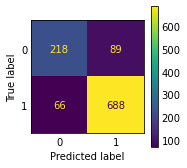

In [107]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
## Confusion matrix on the training data

plot_confusion_matrix(KNN_model,X_train,y_train)

0.831140350877193
[[108  45]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



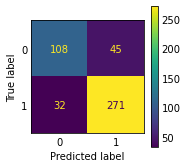

In [108]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(KNN_model,X_test,y_test)

AUC: 0.928


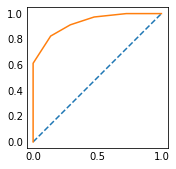

In [109]:
#Predict Probabilites
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.928


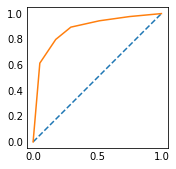

In [110]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);


In [111]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.20833333333333337,
 0.1864035087719298,
 0.16885964912280704,
 0.16447368421052633,
 0.17763157894736847,
 0.1842105263157895,
 0.1885964912280702,
 0.17763157894736847,
 0.17763157894736847,
 0.17982456140350878]

**Plot misclassification error vs k (with k value on X-axis) using matplot**

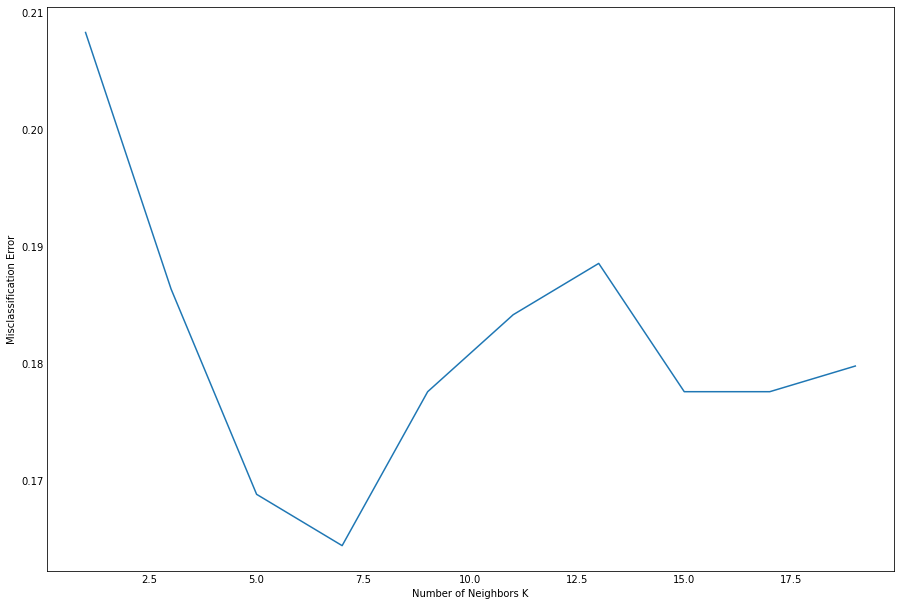

In [112]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.figure(figsize=(12,8))
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 7 is giving the best test accuracy lets check train and test for K=7 with other evaluation metrics

In [113]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

0.8510838831291234
[[218  89]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



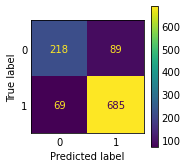

In [114]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train)

0.8355263157894737
[[109  44]
 [ 31 272]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       153
           1       0.86      0.90      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



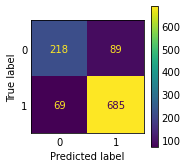

In [115]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(KNN_model,X_train,y_train)

In [116]:
params = {'n_neighbors':list(range(1,21,2)),
         'metric':['minkowski','euclidean','manhattan','chebyshev', 'mahanalobis']}

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params, refit=True,verbose=1)
grid_knn.fit(X_train, y_train)
# refit = For optimised value of K it again calculates output on entire dataset

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev', 'mahanalobis'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             verbose=1)

In [118]:
grid_knn.best_params_

{'metric': 'chebyshev', 'n_neighbors': 7}

0.8605089538171536
[[219  88]
 [ 60 694]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.75       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



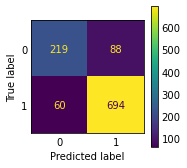

In [119]:
## Performance Matrix on train data set
y_train_predict = grid_knn.predict(X_train)
model_score = grid_knn.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(grid_knn,X_train,y_train)

0.8135964912280702
[[102  51]
 [ 34 269]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.78      0.78       456
weighted avg       0.81      0.81      0.81       456



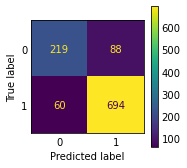

In [120]:
## Performance Matrix on test data set
y_test_predict = grid_knn.predict(X_test)
model_score = grid_knn.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(grid_knn,X_train,y_train)

Boosting

Boosting is a special type of Ensemble Learning technique that works by combining several weak learners(predictors with poor accuracy) into a strong learner(a model with strong accuracy). This works by each model paying attention to its predecessor’s mistakes.

The two most popular boosting methods are:

    Adaptive Boosting
    Gradient Boosting

**Ada Boost**

In [121]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



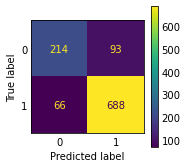

In [122]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(ADB_model,X_train,y_train)

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



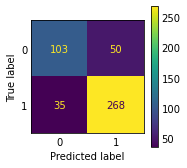

In [123]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(ADB_model,X_test,y_test)

AUC: 0.915


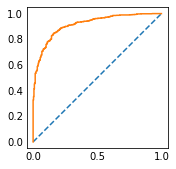

In [124]:
#Predict Probabilites
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.915


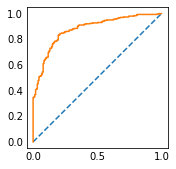

In [125]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Gradient Boosting**

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



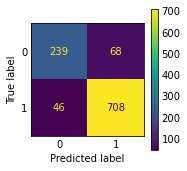

In [127]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(gbcl,X_train,y_train)

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



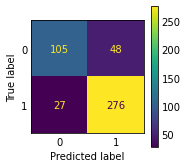

In [128]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(gbcl,X_test,y_test)

AUC: 0.951


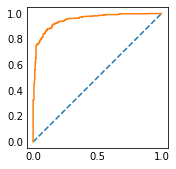

In [129]:
#Predict Probabilites
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.951


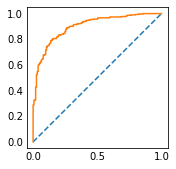

In [130]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [131]:
gbcl.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [132]:
param_test = {'max_depth':range(5,16,2), 'min_samples_split':range(200,2001,200), 'min_samples_leaf':(10,201,50)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=1), 
param_grid = param_test, scoring='roc_auc',n_jobs=4, cv=5)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=60,
                                                  random_state=1,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_leaf': (10, 201, 50),
                         'min_samples_split': range(200, 2001, 200)},
             scoring='roc_auc')

In [133]:
gsearch.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 200}

In [134]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,roc_curve

print("Train Accuracy is :{}".format(accuracy_score(y_train,gsearch.predict(X_train))))
print("\nTest Accuracy is :{}".format(accuracy_score(y_test,gsearch.predict(X_test))))

Train Accuracy is :0.8671065032987747

Test Accuracy is :0.8333333333333334


0.9310560830834896
[[219  88]
 [ 53 701]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.82      0.83      1061
weighted avg       0.86      0.87      0.86      1061



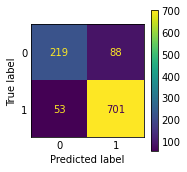

In [135]:
## Performance Matrix on train data set
y_train_predict = gsearch.predict(X_train)
model_score = gsearch.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(gsearch,X_train,y_train)

0.9006557518496947
[[106  47]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



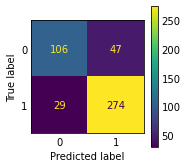

In [136]:
## Performance Matrix on test data set
y_test_predict = gsearch.predict(X_test)
model_score = gsearch.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(gsearch,X_test,y_test)

AUC: 0.931


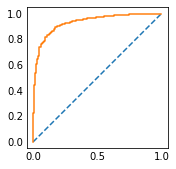

In [137]:
#Predict Probabilites
probs = gsearch.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.931


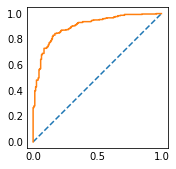

In [138]:
# predict probabilities
probs = gsearch.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**Bagging**

In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=100,random_state=1)

In [140]:
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

0.9679547596606974
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



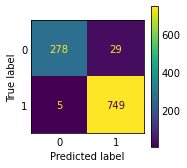

In [141]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(Bagging_model,X_train,y_train)

0.8289473684210527
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



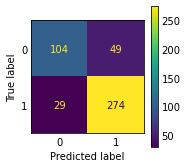

In [142]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(Bagging_model,X_test,y_test)

AUC: 0.997


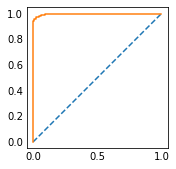

In [143]:
#Predict Probabilites
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.997


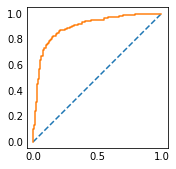

In [144]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [145]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf1 = GridSearchCV(BaggingClassifier(RandomForestClassifier(),
                                     n_estimators = 10, max_features = 0.5),
                   param_grid)
clf1.fit(X_train, y_train)

GridSearchCV(estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         max_features=0.5),
             param_grid={'base_estimator__max_depth': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

0.8162111215834119
[[139 168]
 [ 27 727]]
              precision    recall  f1-score   support

           0       0.84      0.45      0.59       307
           1       0.81      0.96      0.88       754

    accuracy                           0.82      1061
   macro avg       0.82      0.71      0.73      1061
weighted avg       0.82      0.82      0.80      1061



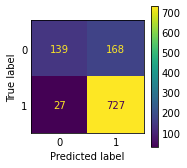

In [146]:
## Performance Matrix on train data set
y_train_predict = clf1.predict(X_train)
model_score =clf1.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(clf1,X_train,y_train)

0.7872807017543859
[[ 72  81]
 [ 16 287]]
              precision    recall  f1-score   support

           0       0.82      0.47      0.60       153
           1       0.78      0.95      0.86       303

    accuracy                           0.79       456
   macro avg       0.80      0.71      0.73       456
weighted avg       0.79      0.79      0.77       456



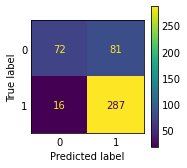

In [147]:
## Performance Matrix on test data set
y_test_predict = clf1.predict(X_test)
model_score = clf1.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(clf1,X_test,y_test)

**Random Forest**

In [148]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



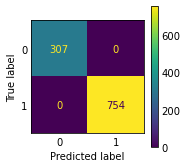

In [149]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(RF_model,X_train,y_train)

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



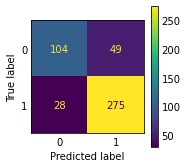

In [150]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(RF_model,X_test,y_test)

AUC: 1.000


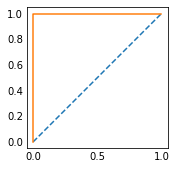

In [151]:
#Predict Probabilites
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


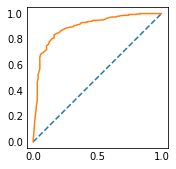

In [152]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.

max_depth = maximum number of levels allowed in each tree.

max_features = maximum number of features considered when splitting a node.

min_samples_leaf = minimum number of samples which can be stored in a tree leaf.

min_samples_split = minimum number of samples necessary in a node to cause node splitting.

n_estimators = number of trees in the ensamble.


In [153]:
### Manual Hyperparameter Tuning
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
model=RandomForestClassifier(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=1).fit(X_train,y_train)

0.8586239396795476
[[206 101]
 [ 49 705]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       307
           1       0.87      0.94      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.80      0.82      1061
weighted avg       0.86      0.86      0.85      1061



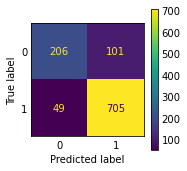

In [154]:
## Performance Matrix on train data set
y_train_predict = model.predict(X_train)
model_score =model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(model,X_train,y_train)

0.8223684210526315
[[ 98  55]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       153
           1       0.83      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



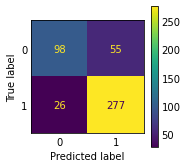

In [155]:
## Performance Matrix on test data set
y_test_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(model,X_test,y_test)

In [156]:
#Randomized Search Cv
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [157]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,
                               random_state=1,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

In [158]:
rf_randomcv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [159]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

In [160]:
best_random_grid=rf_randomcv.best_estimator_

In [161]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=14, n_estimators=1200)

0.8925541941564562
[[231  76]
 [ 38 716]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       307
           1       0.90      0.95      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



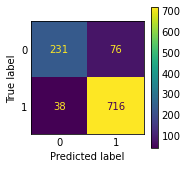

In [162]:
## Performance Matrix on train data set
y_train_predict = best_random_grid.predict(X_train)
model_score =best_random_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(best_random_grid,X_train,y_train)

0.8421052631578947
[[103  50]
 [ 22 281]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       153
           1       0.85      0.93      0.89       303

    accuracy                           0.84       456
   macro avg       0.84      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



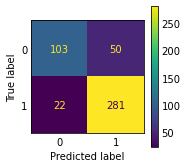

In [163]:
# Performance Matrix on test data set
y_test_predict = best_random_grid.predict(X_test)
model_score = best_random_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(best_random_grid,X_test,y_test)

In [164]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [1000, 1100, 1200, 1300, 1400]}


In [165]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [1000, 1100, 1200, 1300, 1400]},
             verbose=2)

In [166]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=14, n_estimators=1000)

In [167]:
best_grid=grid_search.best_estimator_

In [168]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=14, n_estimators=1000)

0.8925541941564562
[[231  76]
 [ 38 716]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       307
           1       0.90      0.95      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



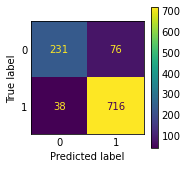

In [169]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score =best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(best_grid,X_train,y_train)

0.8333333333333334
[[103  50]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



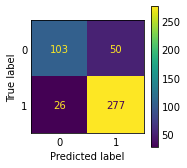

In [170]:
# Performance Matrix on testing data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(best_grid,X_test,y_test)